In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import apply_affine_transform
import random
%matplotlib inline

In [2]:
def noisy(image, mean = 0.03, capacity = random.randint(10000,50000)):
    row,col,ch= image.shape
    sigma = capacity**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch)).reshape(row,col,ch)
    return gauss + image

In [3]:
def move(img, x, y):
    move_matrix = np.float32([[1, 0, x], [0, 1, y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, move_matrix, dimensions)

In [4]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv.INTER_LINEAR)
  return result

## 1.Создание кода, которому на вход подается изображение

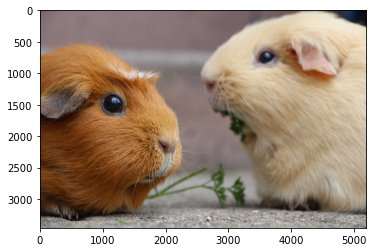

In [5]:
img = cv.imread('test.jpeg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

## 2. К изображению применяется аффинные преобразования

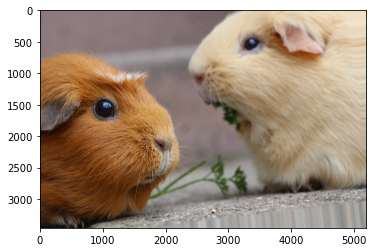

In [6]:
af_img = apply_affine_transform(img_rgb, theta=random.randint(-20,20), row_axis=0, col_axis=1, channel_axis=2)
plt.imshow(af_img)

## 3. Добавляется шум разной плотности

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


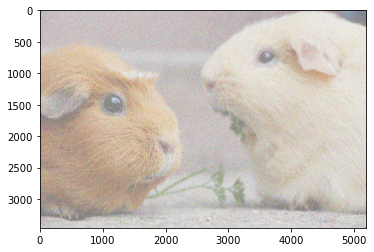

In [7]:
gn_img = noisy(img_rgb)
plt.imshow(gn_img)

## 4. Изображение размывается

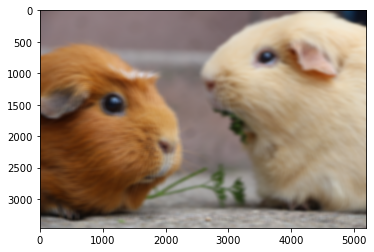

In [8]:
blurImg = cv.blur(img_rgb,(random.randint(1,100),random.randint(1,100)))
plt.imshow(blurImg)

## 5. Перемещается (Tip: вспоминаем срезы)

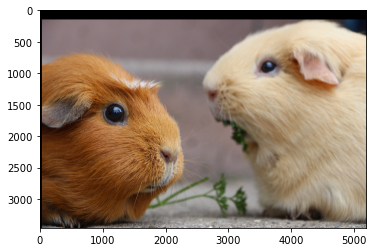

In [9]:
moved = move(img_rgb, 30, 150)
plt.imshow(moved)

## 6. Наклоняется

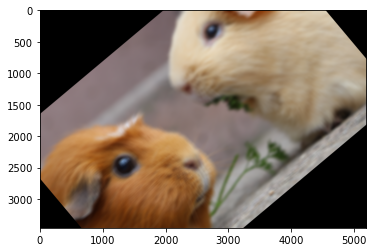

In [10]:
rot_image = rotate_image(blurImg, 40)
plt.imshow(rot_image)

## Из одного изображения 100 разных

In [11]:
def data_augmentation(copy_number, img):
    for i in range (copy_number):
        filename = './100_hundred_new_images/' + str(i) + '.jpg'
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        af_img = apply_affine_transform(img_rgb, theta=random.randint(-20,20), row_axis=0, col_axis=1, channel_axis=2)
        gn_img = noisy(af_img)
        blurImg = cv.blur(gn_img,(random.randint(1,100),random.randint(1,100)))
        moved = move(blurImg, random.randint(1,100), random.randint(1,100))
        final_image = rotate_image(moved, random.randint(1,80))
        cv.imwrite(filename, final_image)

In [12]:
img = cv.imread('test.jpeg')
data_augmentation(100, img)
print('Ready')

Ready
